#**Glass Dataset**

**Problem Statement**

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

!pip install dataprep
from dataprep.eda import create_report

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.7/764.7 KB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 KB 22.9

In [2]:
from google.colab import files
uploaded=files.upload()

Saving glass.csv to glass.csv


In [4]:
glass=pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
glass=glass.drop_duplicates()

In [10]:
glass.shape

(213, 10)

In [15]:
corr=glass.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


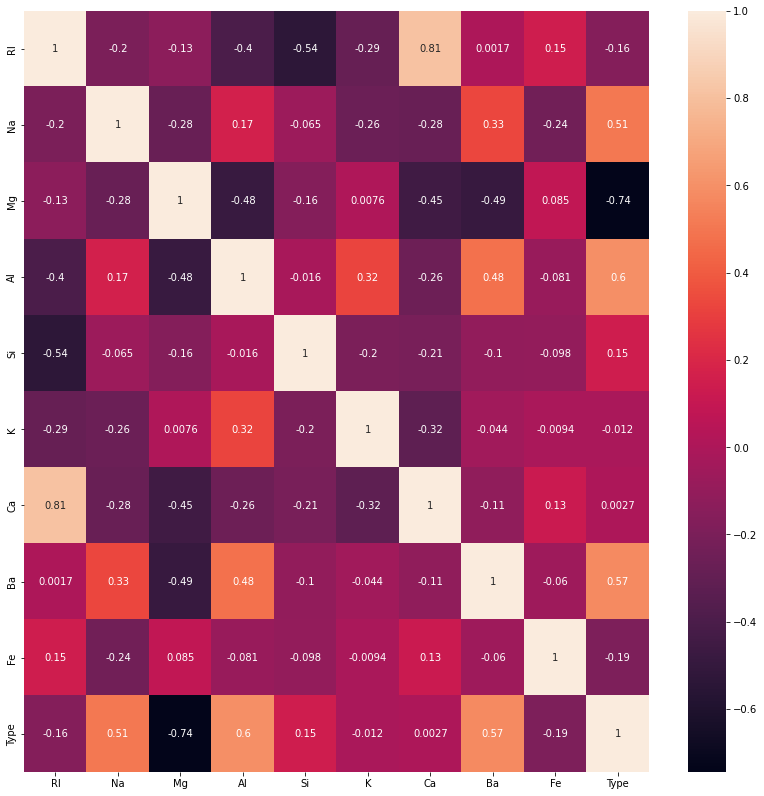

In [18]:
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True)
plt.show()

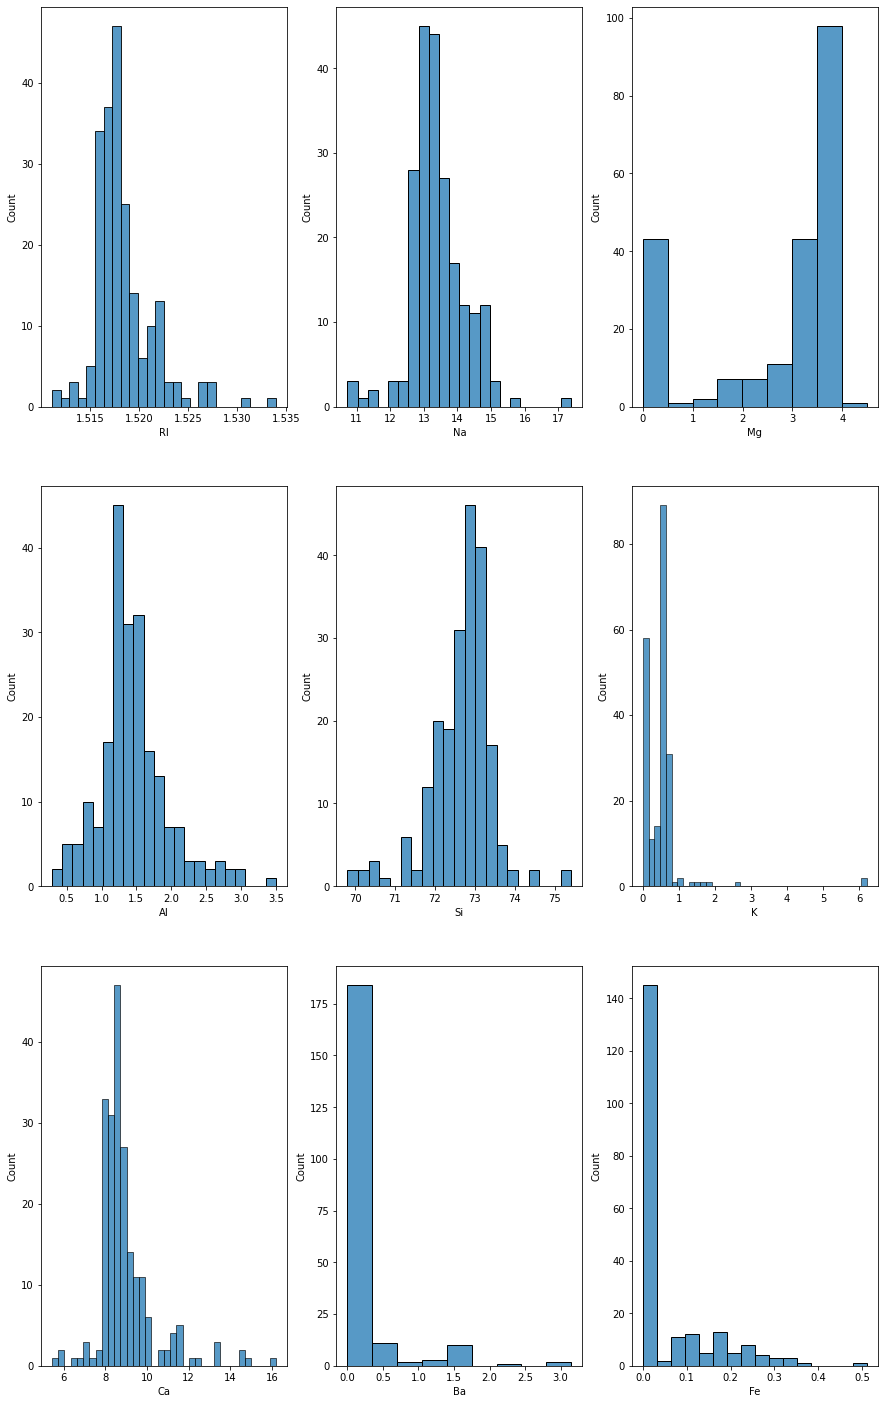

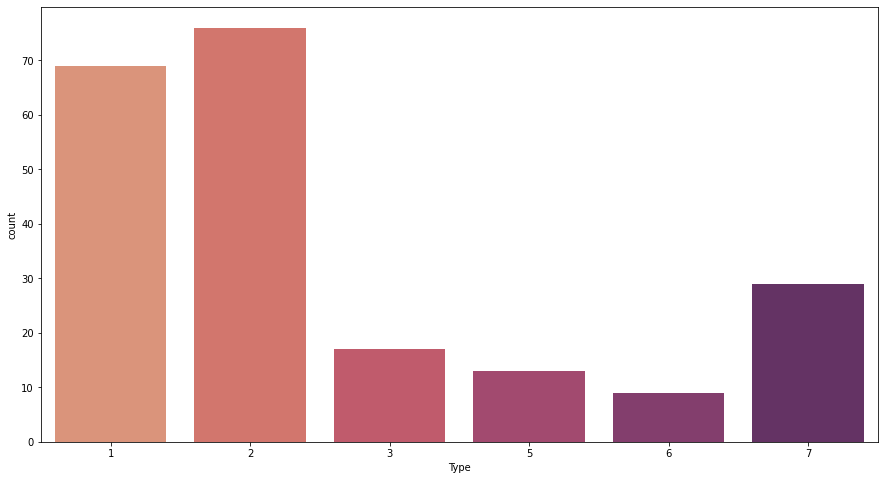

In [19]:
fig,ax=plt.subplots(3,3,figsize=(15,25))

sns.histplot(glass['RI'],palette='mako',ax=ax[0,0])
sns.histplot(glass['Na'], palette='mako', ax=ax[0,1])
sns.histplot(glass['Mg'], palette='mako', ax=ax[0,2])

sns.histplot(glass['Al'], palette='mako', ax=ax[1,0])
sns.histplot(glass['Si'], palette='mako', ax=ax[1,1])
sns.histplot(glass['K'], palette='mako', ax=ax[1,2])

sns.histplot(glass['Ca'], palette='mako', ax=ax[2,0])
sns.histplot(glass['Ba'], palette='mako', ax=ax[2,1])
sns.histplot(glass['Fe'], palette='mako', ax=ax[2,2])

plt.figure(figsize=(15,8))
sns.countplot(glass['Type'], palette='flare')

plt.show()

**Removing of Outliers**

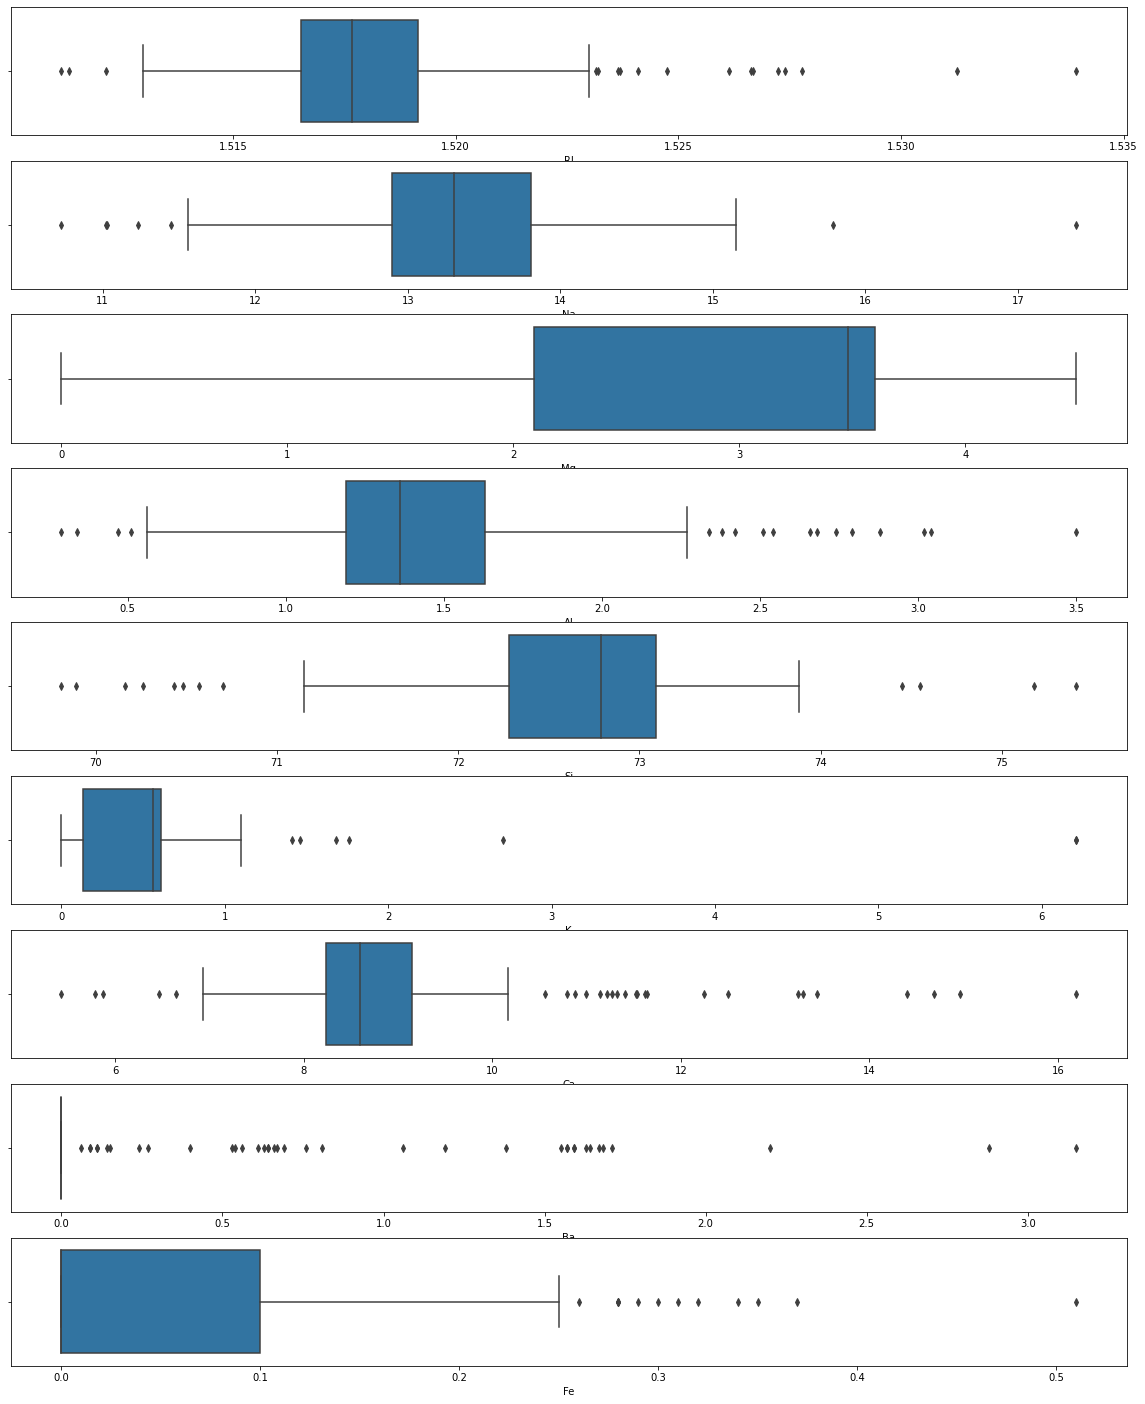

In [20]:
fig,ax =plt.subplots(9,1,figsize=(20,25)) 

sns.boxplot(glass['RI'],ax=ax[0])
sns.boxplot(glass['Na'],ax=ax[1])
sns.boxplot(glass['Mg'],ax=ax[2])

sns.boxplot(glass['Al'],ax=ax[3])
sns.boxplot(glass['Si'],ax=ax[4])
sns.boxplot(glass['K'],ax=ax[5])

sns.boxplot(glass['Ca'],ax=ax[6])
sns.boxplot(glass['Ba'],ax=ax[7])
sns.boxplot(glass['Fe'],ax=ax[8])

In [23]:
glass1=glass.drop('Type',axis=1)
outliers=[]
for feature in glass1.columns:
  Q1,Q3=np.percentile(glass1[feature],[25,75])
  IQR=Q3-Q1
  ul=Q3+1.5*IQR
  ll=Q1-1.5*IQR
  outlier=glass1[feature][(glass1[feature]<ll)|(glass1[feature]>ul)]
  outliers.append(outlier)
outliers

[47     1.52667
 50     1.52320
 56     1.51215
 103    1.52725
 104    1.52410
 105    1.52475
 106    1.53125
 107    1.53393
 110    1.52664
 111    1.52739
 112    1.52777
 131    1.52614
 170    1.52369
 184    1.51115
 185    1.51131
 187    1.52315
 189    1.52365
 Name: RI, dtype: float64, 105    11.45
 106    10.73
 110    11.23
 111    11.02
 166    11.03
 184    17.38
 189    15.79
 Name: Na, dtype: float64, Series([], Name: Mg, dtype: float64), 21     0.29
 38     0.47
 50     0.51
 163    3.50
 171    3.04
 172    3.02
 184    0.34
 191    2.38
 192    2.79
 195    2.68
 196    2.54
 197    2.34
 198    2.66
 199    2.51
 202    2.42
 208    2.74
 209    2.88
 Name: Al, dtype: float64, 103    70.57
 106    69.81
 107    70.16
 109    74.45
 163    69.89
 171    70.48
 172    70.70
 180    74.55
 184    75.41
 188    70.26
 189    70.43
 201    75.18
 Name: Si, dtype: float64, 163    1.68
 171    6.21
 172    6.21
 185    1.76
 186    1.46
 201    2.70
 207    1.41
 Name: K

In [24]:
outliers_df=pd.DataFrame(outliers)
outliers_df

,5,21,32,36,38,44,47,50,56,61,...,204,205,206,207,208,209,210,211,212,213
RI,NaN,NaN,NaN,NaN,NaN,NaN,1.52667,1.5232,1.51215,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Al,NaN,0.29,NaN,NaN,0.47,NaN,NaN,0.5100,NaN,NaN,...,NaN,NaN,NaN,NaN,2.74,2.88,NaN,NaN,NaN,NaN
Si,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.41,NaN,NaN,NaN,NaN,NaN,NaN
Ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,6.47,NaN,NaN,NaN,NaN,NaN,NaN
Ba,NaN,NaN,0.09,0.11,NaN,NaN,NaN,NaN,NaN,0.69,...,0.67,1.55,1.38,2.88,0.54,1.06,1.59,1.64,1.57,1.67
Fe,0.26,NaN,NaN,NaN,NaN,0.3,NaN,NaN,0.31000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
outlier_no=np.isfinite(outliers_df).sum()
outlier_no

5      1
21     1
32     1
36     1
38     1
      ..
209    2
210    1
211    1
212    1
213    1
Length: 78, dtype: int64

In [26]:
outlier_no_df=pd.DataFrame(outlier_no)
outlier_no_df

,0
5,1
21,1
32,1
36,1
38,1
...,...
209,2
210,1
211,1
212,1


In [27]:
outlier_no_df['new_index']=range(0,len(outlier_no_df))
outlier_no_df=outlier_no_df.rename(columns={0:'outlier_no'})
outlier_no_df['index']=outlier_no_df.index
outlier_no_df=outlier_no_df.set_index('new_index')
outlier_no_df

,outlier_no,index
new_index,,
0,1,5
1,1,21
2,1,32
3,1,36
4,1,38
...,...,...
73,2,209
74,1,210
75,1,211


In [28]:
index=[]
for i in range(0,len(outlier_no_df)):
  if outlier_no_df['outlier_no'][i]>2:
    index.append(outlier_no_df['index'][i])

In [29]:
len(index)

14

In [30]:
index

[103, 105, 106, 107, 110, 111, 163, 171, 172, 184, 185, 186, 189, 207]

In [31]:
glass_df=glass.drop([103, 105, 106, 107, 110, 111, 163, 171, 172, 184, 185, 186, 189, 207])

In [58]:
#213-14(outliers)
glass_df.shape

(199, 10)

**Train Test Split & K-Fold cross validation**

In [35]:
x=glass_df.drop(['Type'],axis=1)
y=glass_df["Type"]

Standardisation

In [36]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [37]:
x=std.fit_transform(x)

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [39]:
print('Shape of X_train: ',x_train.shape)
print('Shape of X_test: ',x_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (139, 9)
Shape of X_test:  (60, 9)
Shape of y_train:  (139,)
Shape of y_test:  (60,)


Choosing the proper value for K is hard. So initially consider a random value of K=3.

In [43]:
num_folds=10
kfold=KFold(n_splits=10,shuffle=True)

In [44]:
model=KNeighborsClassifier(n_neighbors=3)
results=cross_val_score(model,x,y,cv=kfold) #X & y is used instead of x_train & y_train because KNN only works on new data.
print("For K=3, Accuracy is: ",np.round(results.mean(),4))

For K=3, Accuracy is:  0.7189


In [45]:
#For K=3
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)
print("For K=3, Accuracy of Train Test Split test is: ",accuracy_score(y_test,y_pred))

For K=3, Accuracy of Train Test Split test is:  0.6666666666666666


**Grid search for algorithm tuning**

***Why to choose odd value of K?***

*The odd value of K should be preferred over even values in order to ensure that there are no ties in the voting. If the square root of a number of data points is even, then add or subtract 1 to it to make it odd.*

In [50]:
n_neighbours=np.array(range(1,40,2))
param_grid=dict(n_neighbors=n_neighbours)

In [51]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold)
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [52]:
print(grid.best_score_)
print(grid.best_params_)

0.7268421052631578
{'n_neighbors': 1}


We can see there is difference in training score & test score which indicates overfitting. When K=1, KNN accuracy is also very close to training score so k+1 is neglected.

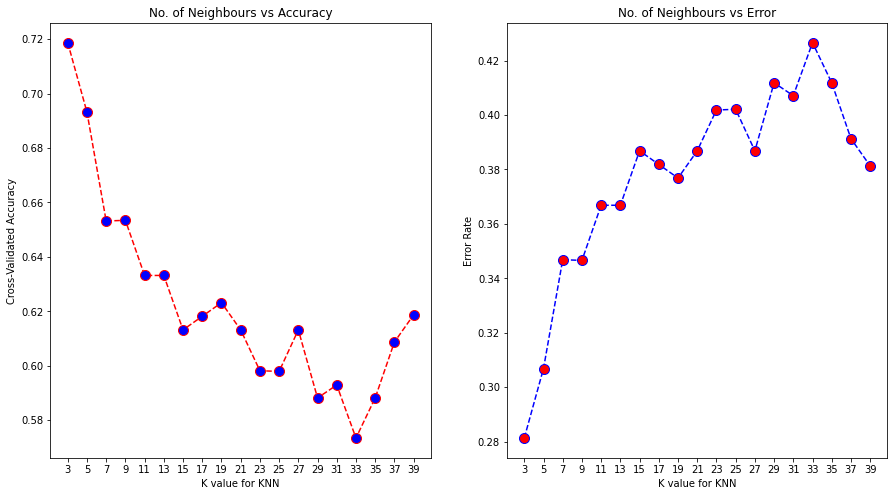

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

#Choose K between 3 - 39
k_range=np.array(range(3,40,2))
k_scores=[]
error_rate=[]

#Use iteration to caclulate different values of K in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
    
    error_rate.append((1-scores.mean()))
      

        
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(k_range,k_scores,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xticks(k_range)
plt.xlabel('K value for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('No. of Neighbours vs Accuracy')

plt.subplot(1,2,2)
plt.plot(k_range,error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10) 
plt.xticks(k_range)
plt.xlabel('K value for KNN')
plt.ylabel('Error Rate')
plt.title('No. of Neighbours vs Error')

plt.show()

In [54]:
#Taking K=3 for maximum accuracy
num_folds=10
kfold=KFold(n_splits=10,shuffle=True)
model=KNeighborsClassifier(n_neighbors=3)
results=cross_val_score(model,x,y,cv=kfold)
print("Accuracy",'\n',results,'\n')
print("Overall Accuracy",np.round(results.mean(),3))

Accuracy 
 [0.7        0.75       0.7        0.75       0.6        0.8
 0.5        0.75       0.9        0.78947368] 

Overall Accuracy 0.724


In [55]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.6666666666666666

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.52      0.83      0.64        18
           2       0.78      0.61      0.68        23
           3       0.00      0.00      0.00         7
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.86      0.92         7

    accuracy                           0.67        60
   macro avg       0.66      0.72      0.67        60
weighted avg       0.64      0.67      0.64        60



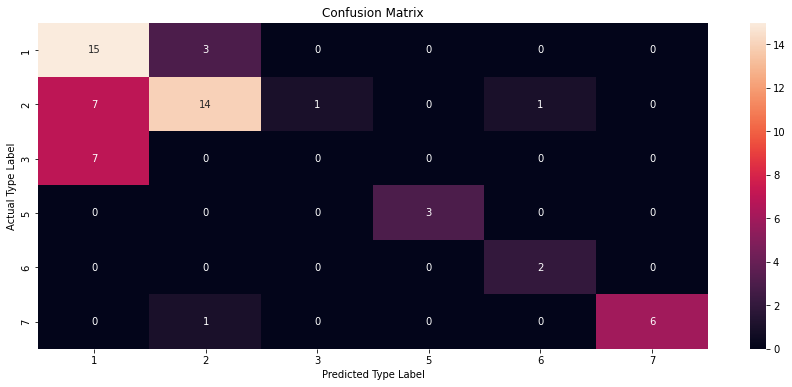

In [57]:
cm_df=confusion_matrix(y_test,y_pred)
type_label=['1','2','3','5','6','7'] #Type 4 is not present in the dataset
df_cm=pd.DataFrame(cm_df,index=type_label,columns=type_label)
plt.figure(figsize=(15,6))
sns.heatmap(df_cm,annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Type Label")
plt.ylabel("Actual Type Label")
plt.show()

#**Zoo Dataset**

In [59]:
uploaded=files.upload()

Saving Zoo.csv to Zoo.csv


In [60]:
zoo=pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [61]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [63]:
zoo.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
96     False
97     False
98     False
99     False
100    False
Length: 101, dtype: bool

In [64]:
zoo.duplicated().sum()

0

**Dython**

**Dython** is a set of **D**ata analysis tools in p**YTHON** 3.x, which can let you get more insights about your data.

Given a dataset, Dython will automatically find which features are categorical and which are numerical, compute a relevant measure of association between each and every feature, and plot it all as an easy-to-read heat-map.

In [65]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 57.3 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: pandas
  

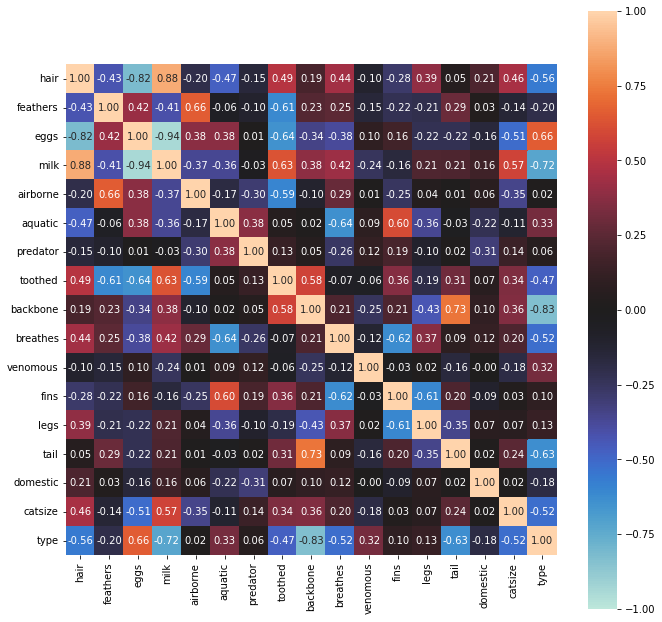

{'corr':               hair  feathers      eggs      milk  airborne   aquatic  \
 hair      1.000000 -0.427851 -0.817382  0.878503 -0.198431 -0.473554   
 feathers -0.427851  1.000000  0.419248 -0.410761  0.656553 -0.058552   
 eggs     -0.817382  0.419248  1.000000 -0.938848  0.376646  0.376244   
 milk      0.878503 -0.410761 -0.938848  1.000000 -0.366765 -0.362613   
 airborne -0.198431  0.656553  0.376646 -0.366765  1.000000 -0.172638   
 aquatic  -0.473554 -0.058552  0.376244 -0.362613 -0.172638  1.000000   
 predator -0.154769 -0.104430  0.011605 -0.029721 -0.295181  0.375978   
 toothed   0.492531 -0.613631 -0.642150  0.628168 -0.594311  0.053150   
 backbone  0.191681  0.231403 -0.340420  0.384958 -0.104718  0.022463   
 breathes  0.441149  0.254588 -0.382777  0.423527  0.286039 -0.637506   
 venomous -0.104245 -0.145739  0.098689 -0.242449  0.008528  0.087915   
 fins     -0.280313 -0.223541  0.164796 -0.156328 -0.251157  0.604492   
 legs      0.394009 -0.206686 -0.224918  0.

In [72]:
from dython.nominal import associations
zoo1=zoo.drop('animal name',axis=1)
associations(zoo1,figsize=(11,11))

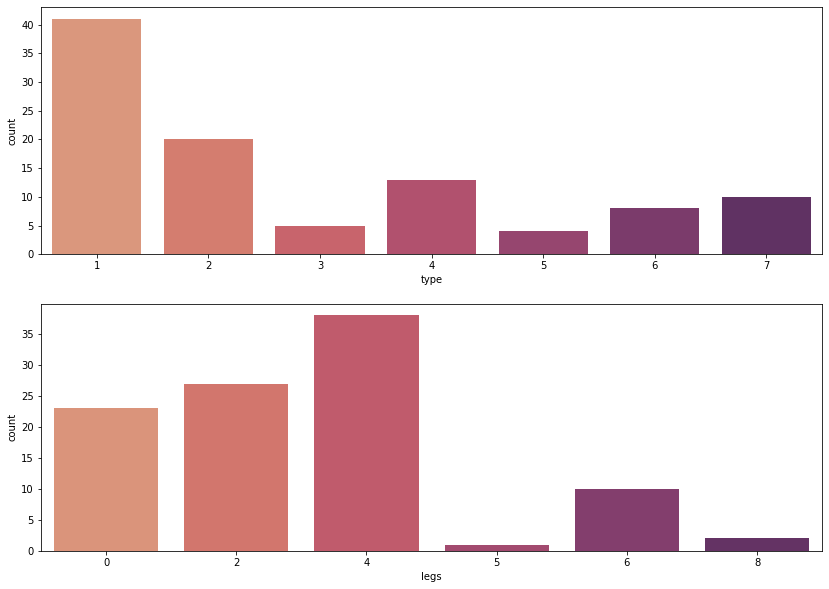

In [73]:
fig,ax=plt.subplots(2,1,figsize=(14,10)) 

sns.countplot(zoo['type'],palette='flare',ax=ax[0])
sns.countplot(zoo['legs'],palette='flare',ax=ax[1])

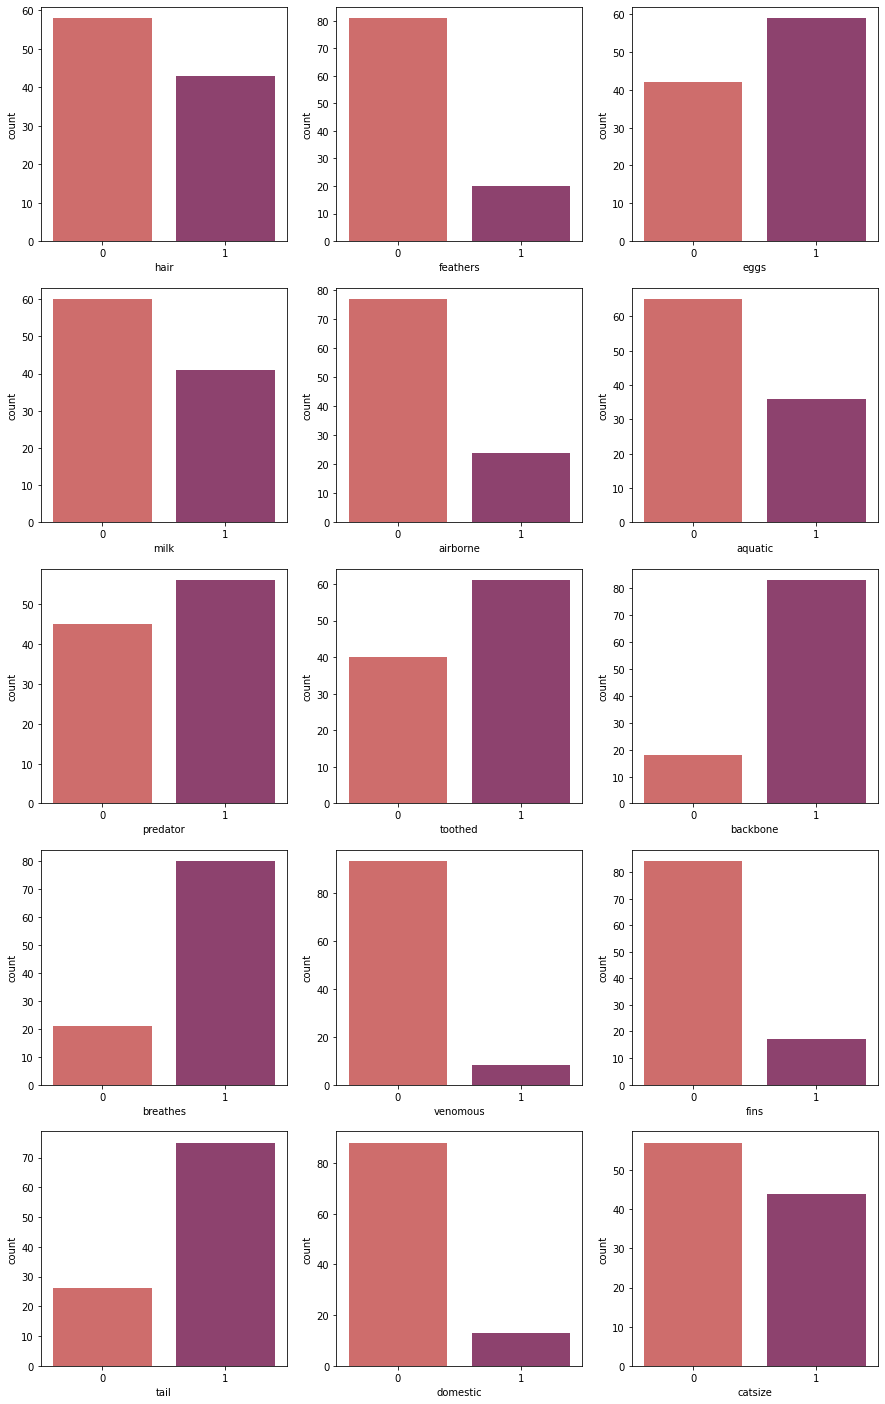

In [74]:
fig,ax=plt.subplots(5,3,figsize=(15,25)) 


sns.countplot(zoo['hair'],palette='flare',ax=ax[0,0])
sns.countplot(zoo['feathers'],palette='flare',ax=ax[0,1])
sns.countplot(zoo['eggs'],palette='flare',ax=ax[0,2])

sns.countplot(zoo['milk'],palette='flare',ax=ax[1,0])
sns.countplot(zoo['airborne'],palette='flare',ax=ax[1,1])
sns.countplot(zoo['aquatic'],palette='flare',ax=ax[1,2])

sns.countplot(zoo['predator'],palette='flare',ax=ax[2,0])
sns.countplot(zoo['toothed'],palette='flare',ax=ax[2,1])
sns.countplot(zoo['backbone'],palette='flare',ax=ax[2,2])

sns.countplot(zoo['breathes'],palette='flare',ax=ax[3,0])
sns.countplot(zoo['venomous'],palette='flare',ax=ax[3,1])
sns.countplot(zoo['fins'],palette='flare',ax=ax[3,2])

sns.countplot(zoo['tail'],palette='flare',ax=ax[4,0])
sns.countplot(zoo['domestic'],palette='flare',ax=ax[4,1])
sns.countplot(zoo['catsize'],palette='flare',ax=ax[4,2]);

**Train Test Split & K fold ceoss validation**

In [75]:
x=zoo.drop(['type','animal name'],axis=1)
y=zoo[['type']]

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

In [79]:
print('Shape of X_train:',x_train.shape)
print('Shape of X_test:',x_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (70, 16)
Shape of X_test: (31, 16)
Shape of y_train: (70, 1)
Shape of y_test: (31, 1)


randomnly select K=5

In [81]:
num_folds=10
kfold=KFold(n_splits=10)

In [82]:
model=KNeighborsClassifier(n_neighbors=5)
results=cross_val_score(model,x,y,cv=kfold)
print("For K=5, Accuracy of K-Fold validation is:",np.round(results.mean(),4))

For K=5, Accuracy of K-Fold validation is: 0.88


In [83]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)
print('With k = 5, Accuracy of train test split is:',accuracy_score(y_test,y_pred))

With k = 5, Accuracy of train test split is: 0.9032258064516129


**Grid search for algorithm tuning**

In [84]:
n_neigh=np.array(range(1,40,2))
param_grid=dict(n_neighbors=n_neigh)

In [85]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold)
grid.fit(x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [86]:
print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'n_neighbors': 1}


In [87]:
n_neigh=np.array(range(3,40,2)) #odd number of K excluding K=1
param_grid=dict(n_neighbors=n_neigh) 

model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=kfold)
grid.fit(x,y)

print(grid.best_score_)
print(grid.best_params_)

0.9400000000000001
{'n_neighbors': 3}


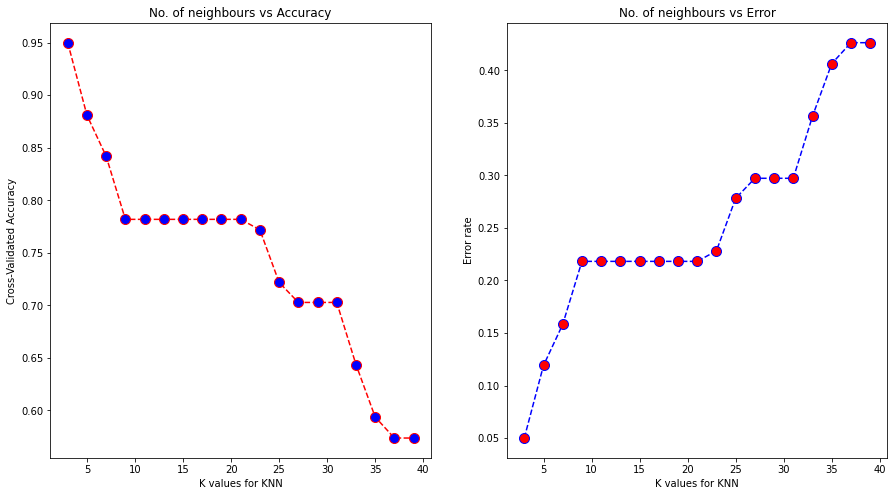

In [88]:
%matplotlib inline

#Choosing K between 3 - 39
k_range=np.array(range(3,40,2))
k_scores=[]
error_rate=[]

#Use iteration to caclulate different values of K in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10)
    k_scores.append(scores.mean())
    
    error_rate.append((1-scores.mean()))
      

        
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(k_range,k_scores,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.xlabel('K values for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('No. of neighbours vs Accuracy')

plt.subplot(1,2,2)
plt.plot(k_range,error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('K values for KNN')
plt.ylabel('Error rate')
plt.title('No. of neighbours vs Error')

plt.show()

By studying the above graphs, we can conclude that the accuracy will be maximum at K=3.

In [89]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9354838709677419

In [90]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00         5
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.94      0.93      0.93        31
weighted avg       0.95      0.94      0.93        31



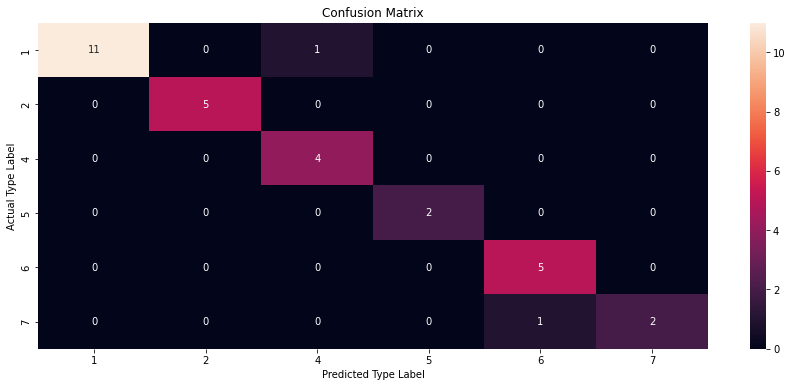

In [91]:
cm_df=confusion_matrix(y_test,y_pred)
type_label=['1','2','4','5','6','7'] #Type 3 is absent in test set

df_cm=pd.DataFrame(cm_df,index=type_label,columns=type_label)
plt.figure(figsize=(15,6))
sns.heatmap(df_cm,annot=True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Type Label")
plt.ylabel("Actual Type Label")
plt.show()